In [82]:
#!pip install scipy

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

%matplotlib inline

In [84]:
"Parameters"

t0 = 0
t1 = 4
z = 0.1
ti = np.arange(t0, t1 + z, z, dtype = np.double)
t = [0]
h = [z]
x = [-1]
tolerance = 10**(-6)

print(ti)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


In [85]:
"IVP0"
ivp0 = lambda t, x: np.sin((t+x)**2)

"Exact Solution"
ex_sol = odeint(ivp0, x[0], ti)

In [86]:
"Runge Kutta 4 Method"
def RK4(f):
    "Save variable"
    rk4_x = []
    for i in range(0, len(ti)):
        rk4_x.append(x[i])
        k1 = h[0] * f(ti[i],x[i])
        k2 = h[0] * f(ti[i]+h[0]/2, x[i]+k1/2)
        k3 = h[0] * f(ti[i]+h[0]/2, x[i]+k2/2)
        k4 = h[0] * f(ti[i]+h[0], x[i]+k3)
        x.append(x[i] + (k1 + 2*(k2+k3) + k4)/6)
    "Return the initial t and h as they are constant"
    return ti, h[0], rk4_x
print(RK4(ivp0))

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. ]), 0.1, [-1, -0.9263079202852346, -0.8731679697268051, -0.8373871337838414, -0.8148887664040223, -0.802020863987738, -0.7957589455289603, -0.7935864243733515, -0.7933146105958759, -0.7929081910616856, -0.7903209946509231, -0.7833308986354753, -0.7693636396120975, -0.7453147657188944, -0.7074508717489797, -0.6516981769044428, -0.5752044839421762, -0.4807689107504656, -0.3833546280029165, -0.30798823461003705, -0.27191621981803316, -0.2745543613199488, -0.30633236273330533, -0.3578520900028112, -0.422450748981233, -0.4958295282808745, -0.5752562440659448, -0.6589689767178206, -0.745803031494168, -0.8349673277623074, -0.9259101906845806, -1.0182373748690545, -1.1116608094671576, -1.205965749339728, -1.3009892069485258, -1.3966054635291874, -1.4927161269476634,

In [87]:
"Fourth order Adaptive Runge-Kutta-Fehlberg Method"
def RKF45(f):
    "Reset"
    t = [0]
    h = [z]
    x = [-1]
    "Iterator"
    i = 0
    "Save variables"
    rkf45_x = []
    rkf45_t = []
    rkf45_h = []
    while True:
        "Condition to break: Time exceeds the given interval"
        if t[i] > t1:
            break
        "Append the computed values to the save variables"
        rkf45_x.append(x[i])
        rkf45_h.append(h[i])
        rkf45_t.append(t[i])
        "The Formulas"
        k1 = h[i] * f(t[i],x[i])
        k2 = h[i] * f(t[i]+h[i]/4, x[i]+k1/4)
        k3 = h[i] * f(t[i]+3*h[i]/8, x[i] + 3*k1/32 + 9*k2/32)
        k4 = h[i] * f(t[i]+12*h[i]/13, x[i] + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h[i] * f(t[i]+h[i], x[i] + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h[i] * f(t[i]+h[i]/2, x[i] - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        x.append(x[i] + 16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)
        TruncationError = np.abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)
        h.append(0.9*h[i]*((tolerance/TruncationError)**(1/5)))
        t.append(t[i] + h[i])
        i += 1
    return rkf45_t, rkf45_h, rkf45_x

In [88]:
"Fourth order Adams-Bashforth scheme"
def AB4(f):
    x = RK4(f)[2]
    i = 3
    while i < len(ti)-1:
        x[i+1] = x[i] + h[0]*(55*f(ti[i], x[i])/24 - 59*f(ti[i-1], x[i-1])/24 + 37*f(ti[i-2], x[i-2])/24 - 9*f(ti[i-3], x[i-3])/24)
        i += 1
    return ti, h[0], x

In [89]:
"The Predictor-Corrector model: fourth order Adam-Bashforth and fourth order Adam- Moulton"
def AB4_AM4(f):
    x = RK4(f)[2]
    i = 3
    while i < len(ti)-1:
        x[i+1] = x[i] + h[0]*(55*f(ti[i], x[i])/24 - 59*f(ti[i-1], x[i-1])/24 + 37*f(ti[i-2], x[i-2])/24 - 9*f(ti[i-3], x[i-3])/24)
        x[i+1] = x[i] + h[0]*(9*f(ti[i+1], x[i+1])/24 + 19*f(ti[i], x[i])/24 - 5*f(ti[i-1], x[i-1])/24 + f(ti[i-2], x[i-2])/24)
        i += 1
    return ti, h[0], x

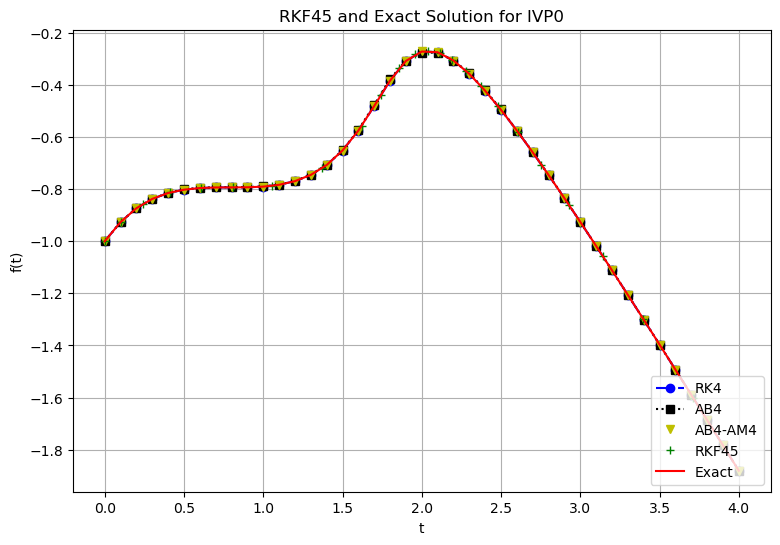

In [90]:
#Compare desired scheme with the exact solution by commenting the others
plt.figure(figsize = (9, 6))
plt.title('RKF45 and Exact Solution for IVP0')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.plot(RK4(ivp0)[0], RK4(ivp0)[2],'bo-.', label='RK4')
plt.plot(AB4(ivp0)[0], AB4(ivp0)[2],'ks:', label='AB4')
plt.plot(AB4_AM4(ivp0)[0], AB4_AM4(ivp0)[2],'yv', label='AB4-AM4')
plt.plot(RKF45(ivp0)[0], RKF45(ivp0)[2],'g+', label='RKF45')
plt.plot(ti, ex_sol,'r', label='Exact')
plt.legend(loc='lower right')
plt.show()

In [91]:
"Convergence Plot"
def convergence_plot():
    x_axis = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 4]
    print(x_axis)
    L2_err_RK4 = []
    for i in (x_axis):
        print(i)
        hh[0] = i
        L2_err_RK4.append(np.linalg.norm(ex_sol - RK4(ivp0, hh)[2])/np.linalg.norm(ex_sol))
    return L2_err_RK4
print(convergence_plot())

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 4]
1e-06


TypeError: RK4() takes 1 positional argument but 2 were given

(Click "Edit this cell" to read it)
Remark about the Convergence Plot: Assumption -> impossible as we use odeint to solve the IVP and it is also a numerical solution which is pretty similar to our schemes. The time space t depends on the step size h, thus i assume that we need analytical solution to provide the convergence plot


"Convergence Plot"
def convergence_plot():
    x_axis = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 4]
    print(x_axis)
    L2_err_RK4 = []
    for i in (x_axis):
        print(i)
        hh[0] = i
        L2_err_RK4.append(np.linalg.norm(ex_sol - RK4(ivp0, hh)[2])/np.linalg.norm(ex_sol))
    return L2_err_RK4
print(convergence_plot())

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 4]
1e-06
1e-05
0.0001
0.001
0.01
0.1
1
4
[12.050328570932637, 12.050328570932637, 12.050328570932637, 12.050328570932637, 12.050328570932637, 12.050328570932637, 12.050328570932637, 12.050328570932637]